# Problem statement is to predict price column based on data with 24 Columns with over 200 data entries using Linear Regression.

In [52]:
#import required libraries

# linear algebra
import numpy as np 

# data processing
import pandas as pd 

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style
import  missingno as ms

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

from scipy import stats 

# Warnings
import warnings
warnings.filterwarnings("ignore")

In [53]:
#Read data("Data.csv") into dataframe
df = pd.read_csv('Data.csv')
#read df in X
X=df
#Copy Target(column to be predicted) in Y
Y=X.price
#drop target from X, now X is input data
X=X.drop('price', axis=1)
X.head(20)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,...,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25
6,7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,...,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25
7,8,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,...,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25
8,9,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,...,five,131,mpfi,3.13,3.40,8.3,140,5500,17,20
9,10,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,...,five,131,mpfi,3.13,3.40,7.0,160,5500,16,22


In [54]:
X.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg'],
      dtype='object')

In [55]:
#Check for null values in X and Y
print(X.shape)
print(X.isnull().sum())
print(Y.isnull().sum())

#what did you observe?
#ans:- There are no null values in the dataset

(205, 25)
car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
dtype: int64
0


In [56]:
#Check if scaling and encoding are required in X
print(X.info())
X.describe()

#is it required or not?
#ans:- Many of the attributes have non-numeric data, we need to encode them into integers.
# As the range of different attributes is different we need to bring them into common scale

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000


,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,1,-0.151621,0.129729,0.170636,0.0523866,0.25596,0.0719616,-0.0339298,0.260064,-0.160824,0.150276,-0.0150056,-0.203789,0.01594,0.0112553,-0.109093
symboling,-0.151621,1,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.10579,-0.130051,-0.00873514,-0.178515,0.0708727,0.273606,-0.0358226,0.034606,-0.0799782
wheelbase,0.129729,-0.531954,1,0.874587,0.795144,0.589435,0.776386,0.569329,0.48875,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,0.170636,-0.357612,0.874587,1,0.841118,0.491029,0.877728,0.68336,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.68292
carwidth,0.0523866,-0.232919,0.795144,0.841118,1,0.27921,0.867032,0.735433,0.55915,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,0.25596,-0.541038,0.589435,0.491029,0.27921,1,0.295572,0.0671487,0.171071,-0.0553067,0.261214,-0.108802,-0.320411,-0.0486396,-0.107358,0.119336
curbweight,0.0719616,-0.227691,0.776386,0.877728,0.867032,0.295572,1,0.850594,0.64848,0.16879,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,-0.0339298,-0.10579,0.569329,0.68336,0.735433,0.0671487,0.850594,1,0.583774,0.203129,0.0289714,0.809769,-0.24466,-0.653658,-0.67747,0.874145
boreratio,0.260064,-0.130051,0.48875,0.606454,0.55915,0.171071,0.64848,0.583774,1,-0.055909,0.00519734,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,-0.160824,-0.00873514,0.160959,0.129533,0.182942,-0.0553067,0.16879,0.203129,-0.055909,1,0.18611,0.0809395,-0.0679638,-0.0421448,-0.0439309,0.0794431


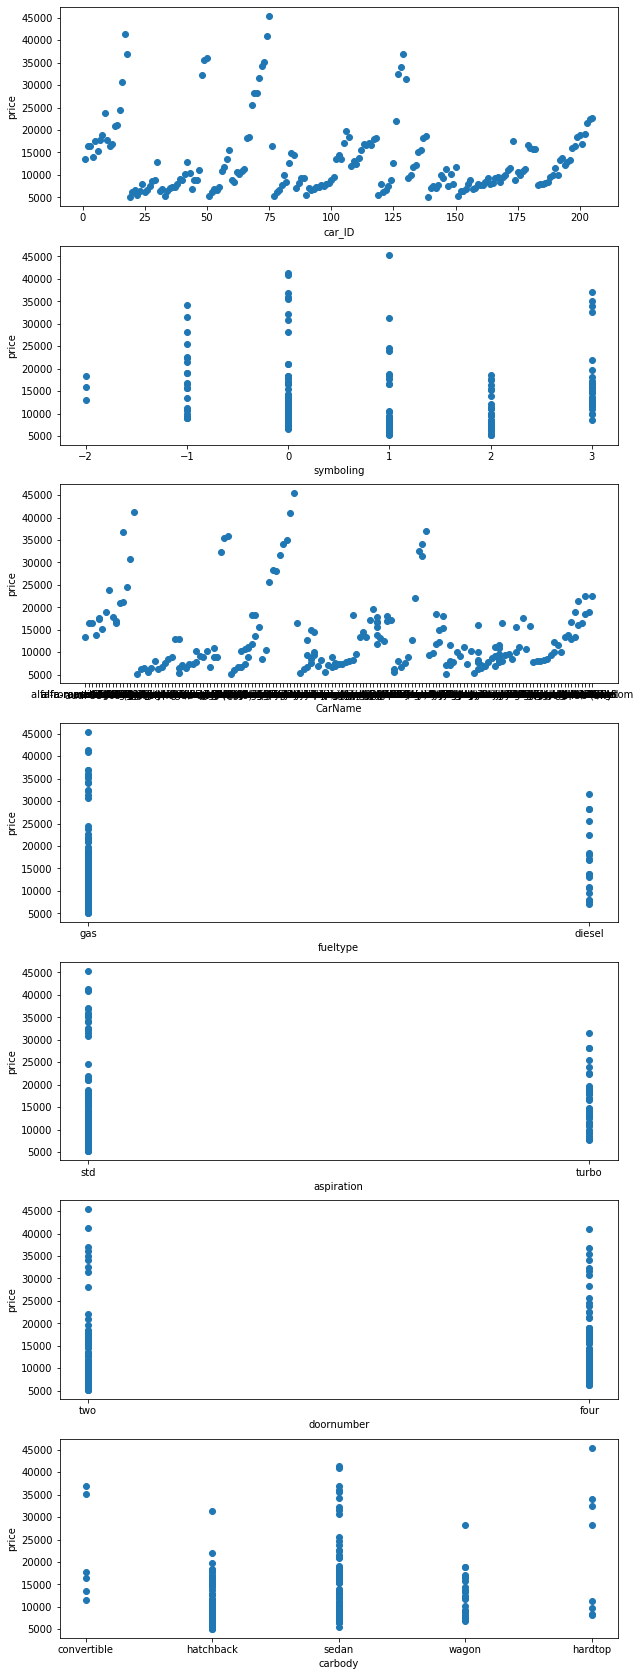

In [57]:
#Plot relationships between the target variable and any 7 features using pair plot,scatter plot,matrix heatmap
fig, axs = plt.subplots(7, figsize=(10,30))
i=0
compare = 'price'
for feature in df.drop('price',axis=1).columns:
    if i == 7: break
    axs[i].scatter(df[feature], df[compare])
    axs[i].set_xlabel(feature)
    axs[i].set_ylabel('price')
    i+=1
    
corr =df.corr()
corr.style.background_gradient(cmap='coolwarm')

#What did you observe?
#ans:- From heatmap we observe a huge correlation between the attributes (like whellbase and carlength etc) 

In [58]:
cleanup_nums = {"doornumber":     {"four": 4, "two": 2},
                "cylindernumber": {"four": 4, "six": 6, "five": 5, "eight": 8,
                                  "two": 2, "twelve": 12, "three":3 }}
X.replace(cleanup_nums, inplace=True)


Cat=X.select_dtypes(include=['object']).copy(deep='False')


Cat=Cat.iloc[:, :].apply(pd.Series)
Name=Cat.CarName.copy()


Temp=[]
Temp=Name.str.split(pat=" ",expand=True)
Temp=Temp[0]
X.CarName=Temp
Cat.CarName=Temp


cleanup_nums = {"CarName":     { "maxda": "mazda" , "porcshce": "porsche" , "Nissan":"nissan" , "vokswagen":"volkswagen", "toyouta" : "toyota","vw" : "volkswagen"} }
X.replace(cleanup_nums, inplace=True)

In [59]:
#check if One hot encoding is required? if yes do it.
# Instead of one hot encoding which will increase the number of columns in the dataset, we will be using
# label encoding to produce simimlar outcome

# Here as the model of the CarName is unique for each car, hence we are discarding the CarName column and 
# replacing it with the Company column which only useful information
X['Company']=0
for i in range(len(X.CarName)):
    X['Company'][i] = X['CarName'][i].split(' ')[0]
X.drop('CarName', axis=1, inplace=True)
X.shape

# labeling all the object features
labelencoder = LabelEncoder()
target_label = labelencoder.fit_transform(X.Company) 
X.Company = target_label

target_label = labelencoder.fit_transform(X.carbody) 
X.carbody = target_label

target_label = labelencoder.fit_transform(X.fueltype) 
X.fueltype = target_label

target_label = labelencoder.fit_transform(X.aspiration) 
X.aspiration = target_label

target_label = labelencoder.fit_transform(X.drivewheel) 
X.drivewheel = target_label

target_label = labelencoder.fit_transform(X.enginelocation) 
X.enginelocation = target_label

target_label = labelencoder.fit_transform(X.enginetype) 
X.enginetype = target_label

target_label = labelencoder.fit_transform(X.fuelsystem) 
X.fuelsystem = target_label

In [60]:
#Scale the Dataset
features = X.columns
x=X.loc[:, features].values
x = StandardScaler().fit_transform(x)
X = pd.DataFrame(x)
X.head(10)

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,-1.723622,1.743470,0.328798,-0.469295,-1.130388,-3.050975,1.213330,-0.121867,-1.690772,-0.426521,...,0.074449,0.869568,0.519071,-1.839377,-0.288349,0.174483,-0.262960,-0.646553,-0.546059,-1.945332
1,-1.706724,1.743470,0.328798,-0.469295,-1.130388,-3.050975,1.213330,-0.121867,-1.690772,-0.426521,...,0.074449,0.869568,0.519071,-1.839377,-0.288349,0.174483,-0.262960,-0.646553,-0.546059,-1.945332
2,-1.689826,0.133509,0.328798,-0.469295,-1.130388,-0.717207,1.213330,-0.121867,-0.708596,-0.231513,...,0.604046,0.869568,-2.404880,0.685946,-0.288349,1.264536,-0.262960,-0.953012,-0.691627,-1.945332
3,-1.672928,0.938490,0.328798,-0.469295,0.884652,0.449677,-0.589081,-0.121867,0.173698,0.207256,...,-0.431076,0.869568,-0.517266,0.462183,-0.035973,-0.053668,0.787855,-0.186865,-0.109354,-1.785879
4,-1.656029,0.938490,0.328798,-0.469295,0.884652,0.449677,-2.391492,-0.121867,0.107110,0.207256,...,0.218885,0.869568,-0.517266,0.462183,-0.540725,0.275883,0.787855,-1.106241,-1.273900,-1.785879
5,-1.639131,0.938490,0.328798,-0.469295,-1.130388,0.449677,-0.589081,-0.121867,0.173698,0.264133,...,0.218885,0.869568,-0.517266,0.462183,-0.414537,0.149133,0.787855,-0.953012,-0.837195,-1.785879
6,-1.622233,0.133509,0.328798,-0.469295,0.884652,0.449677,-0.589081,-0.121867,1.172521,1.515437,...,0.218885,0.869568,-0.517266,0.462183,-0.414537,0.149133,0.787855,-0.953012,-0.837195,-1.785879
7,-1.605334,0.133509,0.328798,-0.469295,0.884652,1.616562,-0.589081,-0.121867,1.172521,1.515437,...,0.218885,0.869568,-0.517266,0.462183,-0.414537,0.149133,0.787855,-0.953012,-0.837195,-1.785879
8,-1.588436,0.133509,0.328798,2.130854,0.884652,0.449677,-0.589081,-0.121867,1.172521,1.515437,...,0.098522,0.869568,-0.739338,0.462183,-0.465012,0.909635,0.787855,-1.259470,-1.565037,-1.785879
9,-1.571538,-0.671472,0.328798,2.130854,-1.130388,-0.717207,-2.391492,-0.121867,0.123757,0.337262,...,0.098522,0.869568,-0.739338,0.462183,-0.793101,1.416637,0.787855,-1.412700,-1.273900,-1.785879


In [94]:
#Splitting data into test and train - 30% Test and 70% Train
X['price'] = Y
train_df, test_df = train_test_split(X)
X_train = train_df.drop('price', axis=1)
Y_train = train_df['price']
X_test = test_df.drop('price', axis=1)
Y_test = test_df['price']

In [95]:
#Find correlation coeff using linear regression.
lr = LinearRegression()
lr.fit(X_train, Y_train)
Y_pred = lr.predict(X_test)
# count=0
acc_log = round (lr.score(X_test, Y_test) * 100, 2)
acc_log


91.88

In [96]:
# Print The coefficients
print(lr.coef_)
#What did you observe looking at the coeffients, Describe your observation in atleast 30 words?
#ans:- Positive coeffients imply that the outcome increases with increase in that attribute, simillarly
# negative coffecients immply outcome decreases with increase in that attribute

[ 4.69719177e+03  1.10490737e+02  1.64213156e+03  3.55633092e+00
  6.61902837e+01 -8.33856949e+01  2.72282481e+01  1.73457657e+03
  1.19615910e+03 -3.71050402e+02  2.36157106e+02 -1.83378092e+02
  1.77671576e+03 -1.58520767e+02 -1.13793755e+03  3.54263346e+03
 -2.17984602e+02 -3.28424628e+02 -1.06212615e+03  2.22375795e+03
  1.96083552e+03  2.23156878e+02 -1.43227198e+03  1.57916721e+03
 -6.05931260e+03]
